# Gradient Descent and Loss Functions

Authors: [Alexander Wang](https://github.com/awang9999), [Winnie Chow](https://github.com/winnie0617)

<img src="images/header_picture.png" width=300 height=200 />

This module introduces the gradient descent algorithm for optimization and loss functions within the context of machine learning. This material is intended to be delivered on April 16, 2022 at a Cornell Data Science onboarding presentation, but is sufficient as standalone material as well.

Topics covered:
* Loss functions (MSE, MAE, Binary Cross Entropy, Hinge Loss)
* Gradient Descent (general algorithm and intuition, proof of convergence omitted)
* Gradient Descent variants (SGD, Mini-batched SGD)
* Brief discussion on Newton's method
* Example of applying gradient descent to solve the optimization problem for multidimensional linear regression (using MSE loss).

Associated slides for this presentation can be found [here](https://docs.google.com/presentation/d/1Er7sTuaL892dptan2unGSKmaC3BG7pKy8oNUIteFOhA/edit#slide=id.p).

In [97]:
import sys
print(sys.version)
# Require versions 3.7, 3.8 or 3.9

3.9.5 (default, Jan  2 2022, 22:23:27) 
[GCC 11.1.0]


### Part 1: Motivation

Up until now “training” models have largely been a black box. We talk about it all the time, but how do we REALLY adjust the parameters of a model? What is a good measure for how well a model predicts the training data? How do we adjust the model parameters based on the model’s performance in predicting the training data automatically?

This module aims to answer these questions.

### Part 2: Consider this problem

For the rest of this module, we will work on solving a linear regression problem in higher dimensions (i.e. dim > 1). First we produce a noisy 2 dimensional linearly distributed dataset. (I.e. it can be modeled by a plane)

In [13]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [40]:
def f(x1, x2):
    return 0.15*x1 + 0.3*x2 + 0.2

In [112]:
def generate_data(n):
    Xs = np.zeros((n,2))
    Xs[:,0] = np.random.uniform(0, 100, n)
    Xs[:,1] = np.random.uniform(0, 100, n)
    ydelta = np.random.uniform(-10, 10, n)
    
    Ys = f(Xs[:,0], Xs[:,1]) + ydelta
    
    return Xs, Ys

In [113]:
Xs, Ys = generate_data(100)

We can visualize our dataset using a 3D plot. Indeed, it can be modelled by a plane.

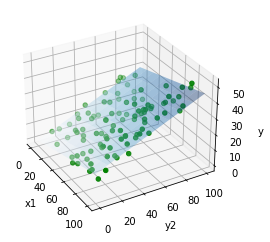

In [117]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Xs[:,0], Xs[:,1], Ys, c='green')

x = np.linspace(0, 100, 10)
y = np.linspace(0, 100, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', edgecolor='none', alpha=0.4)

ax.set_xlabel('x1')
ax.set_ylabel('y2')
ax.set_zlabel('y');
ax.view_init(30, -30)

#### Vector Calculus Recap

The equation of a plane is given by

$$f(x_1, x_2) = ax_1 + bx_2 + c$$

We can rewrite this in vector form as

$$ f(x) = \begin{bmatrix}a & b\end{bmatrix} \begin{bmatrix}x_1 \\ x_2\end{bmatrix} + c$$